CNN with CIFAR-10 data(Pytorch)
===========

Import pakages
-----

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from torch import nn
from torchsummary import summary as summary_
from torch import optim

from keras.datasets import cifar10

c:\Users\user\.conda\envs\test\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\user\.conda\envs\test\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\user\.conda\envs\test\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Download datas
-----

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


Preprocess datas
----

In [3]:
print(X_train)
print(X_train.shape)
print(X_train.dtype)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [4]:
print(y_train)
print(y_train.shape)
print(y_train.dtype)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 1)
uint8


In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
print(X_train)
print(X_train.shape)
print(X_train.dtype)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

In [7]:
y_train = np.array(y_train, dtype=np.int8)
y_test = np.array(y_test, dtype=np.int8)

In [8]:
print(y_train)
print(y_train.shape)
print(y_train.dtype)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 1)
int8


If we use a CNN model with Pytorch, we need to change the shape of dataset as
$\left( N, C, H, W \right)$.

$N$ means the number of data.

$C$ means the number of channel.

$H$, $W$ mean the size of data.

In [9]:
X_train = np.reshape(X_train,(-1,3,32,32))
X_test = np.reshape(X_test,(-1,3,32,32))

print(X_train.shape)

(50000, 3, 32, 32)


In [10]:
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [22]:
data, target = next(iter(loader_train))

In [26]:
target.shape

torch.Size([64, 1])

Construct model
-----



Pythorch provides a convolutional neural network layer through the command "torch.nn.Conv2d".

Also, we need a (max/average) pooling layer during CNN model.

Pythorch provides a pooling layer through the command "torch.nn.MaxPool2d", "torch.nn.AvgPool2d".

torch.nn.Conv2d
------
torch.nn.Conv2d has 3 essential inputs (in_channels / out_channels / kernel_size)

in_channels : the number of channels of input data

out_channels : the number of channels of output data

kernel_size : the size of kernel 

torch.nn.Conv2d has other inessential inputs(stride / padding / padding_mode / dilation / bias etc.)

stride : the stride of the convolution - default = 1

padding : the length of padding - default = 0

padding_mode : how method of padding('zeros', 'reflect', 'replicate', 'circular') - default = 'zeros'

dilation : spacing between kernel elements - default = 1

bias : whether adding a learnable bias to the output - default = True

output size formular is

![ex_screenshot](./output_form.jpg)


In [11]:
model = nn.Sequential()
model.add_module('conv1',nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1, padding_mode='zeros'))
model.add_module('relu1',nn.ReLU())
model.add_module('pool1',nn.MaxPool2d(2,2))
model.add_module('conv2',nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, padding_mode='zeros'))
model.add_module('relu2',nn.ReLU())
model.add_module('pool2',nn.MaxPool2d(2,2))
model.add_module('flatten',nn.Flatten())
model.add_module('fc1', nn.Linear(in_features=64*8*8, out_features=512))
model.add_module('relu3', nn.ReLU())
model.add_module('fc2', nn.Linear(in_features=512, out_features=64))
model.add_module('relu4', nn.ReLU())
model.add_module('fc3', nn.Linear(in_features=64, out_features=10))

summary_(model,input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]          18,496
              ReLU-5           [-1, 64, 16, 16]               0
         MaxPool2d-6             [-1, 64, 8, 8]               0
           Flatten-7                 [-1, 4096]               0
            Linear-8                  [-1, 512]       2,097,664
              ReLU-9                  [-1, 512]               0
           Linear-10                   [-1, 64]          32,832
             ReLU-11                   [-1, 64]               0
           Linear-12                   [-1, 10]             650
Total params: 2,150,538
Trainable params: 2,150,538
Non-trainable params: 0
---------------------------

In [12]:
# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets.squeeze(dim=-1))  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch+1))

In [14]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.2f}%)\n'.format(correct,
                                                   data_num, 100. * float(correct) / float(data_num)))
    return float(correct) / float(data_num)

In [15]:
index = np.random.randint(10000)

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
data = data.view([-1,3,32,32])
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : " + str(predicted.item()))
print("이 이미지 데이터의 정답 레이블 : " + str(y_test[index].item()))

예측 결과 : 5
이 이미지 데이터의 정답 레이블 : 7


Before training
-----
We can test the model before training.

In [16]:
test()


테스트 데이터에서 예측 정확도: 1000/10000 (10.00%)



0.1

Training
-----

In [17]:
acc = []
MAX_ITERATION=5
for epoch in range(MAX_ITERATION):
    train(epoch)
    acc.append(test())


epoch1：완료


테스트 데이터에서 예측 정확도: 4170/10000 (41.70%)

epoch2：완료


테스트 데이터에서 예측 정확도: 4475/10000 (44.75%)

epoch3：완료


테스트 데이터에서 예측 정확도: 4903/10000 (49.03%)

epoch4：완료


테스트 데이터에서 예측 정확도: 5091/10000 (50.91%)

epoch5：완료


테스트 데이터에서 예측 정확도: 5114/10000 (51.14%)



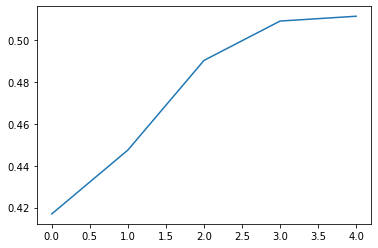

In [18]:
plt.plot(acc)

Check the model with data in testset
------

In [19]:
model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
data = data.view([-1,3,32,32])
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : " + str(predicted.item()))
print("이 이미지 데이터의 정답 레이블 : " + str(y_test[index].item()))


예측 결과 : 7
이 이미지 데이터의 정답 레이블 : 7
